In [1]:
### Install H2O
!pip install h2o

In [2]:
import h2o
from h2o.automl import H2OAutoML

In [3]:
### Initialize H2o Cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.20.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.20.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpyeepomxe
  JVM stdout: /tmp/tmpyeepomxe/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpyeepomxe/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.7
H2O_cluster_version_age:,1 month and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_i20n13
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [4]:
# Data Preparation
df = h2o.import_file(path='../input/song-popularity-prediction/train.csv')
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,212990,0.642286,0.85652,0.707073,0.0020014,10,nan,-5.61909,0,0.0825696,158.386,4,0.734642,0
1,nan,0.0548656,0.733289,0.835545,0.000995659,8,0.436428,-5.23697,1,0.127358,102.753,3,0.711531,1
2,193213,nan,0.188387,0.783524,-0.00269406,5,0.170499,-4.95176,0,0.0522816,178.686,3,0.425536,0
3,249893,0.48866,0.585234,0.552685,0.000608044,0,0.0948051,-7.89369,0,0.0356175,128.716,3,0.453597,0
4,165969,0.493017,nan,0.740982,0.00203315,10,0.094891,-2.68409,0,0.0507461,121.928,4,0.741311,0
5,188891,0.0356551,0.825919,0.804528,-5.26787e-06,4,0.120758,-6.12293,0,0.0390124,115.679,4,0.709408,0
6,161061,0.081743,0.673588,0.880181,0.000327082,0,0.535411,-2.90961,1,0.0309019,98.0462,4,0.982729,0
7,196202,0.259747,0.813214,0.554385,0.000389968,8,0.27658,-7.79424,0,0.207067,158.627,3,0.662987,1
8,169660,nan,0.653263,0.917034,0.00174775,0,nan,-4.42209,0,0.0316082,122.382,3,0.297683,1
9,167245,0.019617,0.595235,0.820039,0.761884,5,0.181098,-5.15429,0,0.0544928,110.525,4,0.535453,0


In [5]:
# Describe the dataset. H2O provides 10 rows of sample data along with basic summary statistics for numerical columns.
df.describe(chunk_summary=True)

Rows:40000
Cols:15

Chunk compression summary: 


,chunk_type,chunk_name,count,count_percentage,size,size_percentage
0,CBS,Binary,32,13.333334,12.0 KB,0.379799
1,C1,1-Byte Integers,16,6.666667,40.1 KB,1.273475
2,C1N,1-Byte Integers (w/o NAs),16,6.666667,40.1 KB,1.273475
3,C2,2-Byte Integers,13,5.416666,64.3 KB,2.041689
4,C2S,2-Byte Fractions,3,1.250000,14.9 KB,0.473028
5,C4,4-Byte Integers,16,6.666667,157.3 KB,4.992738
6,C8D,64-bit Reals,144,60.000004,2.8 MB,89.565796



Frame distribution summary: 


,,size,number_of_rows,number_of_chunks_per_column,number_of_chunks
0,127.0.0.1:54321,3.1 MB,40000.0,16.0,240.0
1,mean,3.1 MB,40000.0,16.0,240.0
2,min,3.1 MB,40000.0,16.0,240.0
3,max,3.1 MB,40000.0,16.0,240.0
4,stddev,0 B,0.0,0.0,0.0
5,total,3.1 MB,40000.0,16.0,240.0


,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
type,int,int,real,real,real,real,int,real,real,int,real,real,int,real,int
mins,0.0,25658.0,-0.013551155261369676,0.04396067633620776,-0.0016822004137934388,-0.004398050996639113,0.0,0.02784311301711874,-32.117910852313194,0.0,0.015064659118313756,62.05577907947696,2.0,0.013397854605505854,0.0
mean,19999.5,193165.84757235576,0.27640443038795054,0.5709511548062325,0.6839319477138394,0.036526755987754254,5.042604702935856,0.19851369124259652,-7.407596207923785,0.32115,0.09410654997438574,116.5628148814794,3.3943749999999984,0.5806448560934734,0.3644
maxs,39999.0,491671.0,1.0652843610501974,0.9571308047062228,1.0397413046716637,1.0754146806463265,11.0,1.0652980309790911,-0.8773458492126069,1.0,0.5607483509425971,219.16357815182732,5.0,1.022557575991481,1.0
sigma,11547.149720457714,45822.127678730154,0.297927929273225,0.19001048177959698,0.2126620001780215,0.1500239025092388,3.3727278010780672,0.15166991342438635,3.8771975994627903,0.466924113698574,0.08359080852981936,26.167910622054386,0.5244046475584093,0.23735076368850344,0.48126752483495233
zeros,1,0,0,0,0,0,5175,0,0,27154,0,0,0,0,25424
missing,0,4101,3992,4026,3975,3985,4065,4086,3957,0,0,0,0,0,0
0,0.0,212990.0,0.6422855173628494,0.856520289337845,0.7070729145792185,0.0020014003683315263,10.0,nan,-5.619087886398954,0.0,0.08256958687204971,158.38623597149538,4.0,0.734641556566576,0.0
1,1.0,nan,0.054865638751987154,0.733288830346718,0.8355448104272071,0.000995659203443104,8.0,0.4364280587619082,-5.236965003084969,1.0,0.12735849427209936,102.75298842030163,3.0,0.711530550966967,1.0
2,2.0,193213.0,nan,0.1883870987713084,0.7835236013353863,-0.0026940563945809727,5.0,0.17049867885215916,-4.951758857474628,0.0,0.0522816125702891,178.6857910658144,3.0,0.4255360161572187,0.0


In [6]:
##  Split the dataset into train and test set
train, test = df.split_frame(ratios=[0.8], seed = 1)

In [7]:
y = "song_popularity"
x = train.columns
x.remove(y)

### Train AutoML Models
Let's configure the AutoML training parameters.
* **max_models**: Maximum number of models to train
* **balance_classes**: set to True to balance the class labels for tasks with imbalance data
* **seed** : Set for reproducibility

#### We can limit the amount of time spent on searching for the best model by limiting:
* maximum number of models using max_models
* total time spent using max_runtime_secs
* time spend training any single model using max_runtime_secs_per_model.

#### Start the training by specifying:
* training_frame: the dataframe that contains training data
* y: the column in the training_frame which contains the target variable

In [8]:
aml = H2OAutoML(max_models =20, balance_classes=True,seed =7 ,exclude_algos = [ "DeepLearning"], nfolds=5)

### 2nd way
# aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [9]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [10]:
%%time
aml.train(training_frame = train, y = y, x=x)

AutoML progress: |
13:10:31.58: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

██
13:10:56.108: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

█
13:11:01.120: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

█
13:11:13.141: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before tr

### Evaluation
After the models are trained, we can compare the model performance using the leaderboard. H2O AutoML produces a leaderboard which ranks the trained model based on a predefined metric. By default it ranks models by ascending order of logloss and rmse for classification and regression task respectively.

#### `NOTE:` The leaderboard metrics are calculated based on the cross validation set unless a leaderboard_frame is specified during training.

In [11]:
lb = aml.leaderboard

In [12]:
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_3_AutoML_1_20220131_131030,0.228518,0.478036,0.228518,0.456835,0.33627
StackedEnsemble_BestOfFamily_4_AutoML_1_20220131_131030,0.228645,0.478169,0.228645,0.45715,0.336359
StackedEnsemble_AllModels_2_AutoML_1_20220131_131030,0.228689,0.478215,0.228689,0.457159,0.336392
StackedEnsemble_AllModels_6_AutoML_1_20220131_131030,0.228721,0.478248,0.228721,0.457897,0.33642
StackedEnsemble_BestOfFamily_7_AutoML_1_20220131_131030,0.228769,0.478298,0.228769,0.458302,0.336458
StackedEnsemble_AllModels_1_AutoML_1_20220131_131030,0.228918,0.478454,0.228918,0.457581,0.336571
StackedEnsemble_BestOfFamily_3_AutoML_1_20220131_131030,0.228968,0.478506,0.228968,0.457702,0.336603
StackedEnsemble_BestOfFamily_2_AutoML_1_20220131_131030,0.229125,0.47867,0.229125,0.458164,0.336732
XGBoost_grid_1_AutoML_1_20220131_131030_model_1,0.229137,0.478683,0.229137,0.456316,0.336733
XGBoost_grid_1_AutoML_1_20220131_131030_model_5,0.229222,0.478771,0.229222,0.456966,0.336785


In [13]:
# aml.train(training_frame = train,y = 'song_popularity',leaderboard_frame = my_leaderboard_frame)
aml.train(training_frame = train,y = y)

AutoML progress: |
13:10:31.58: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.
13:10:56.108: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.
13:11:01.120: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.
13:11:13.141: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.
13

In [14]:
### Lets get the best performing model
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_1_20220131_131030

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.20466219854773945
RMSE: 0.45239606380663777
MAE: 0.4323336903438764
RMSLE: 0.31801117301291587
R^2: 0.11576439957927043
Mean Residual Deviance: 0.20466219854773945
Null degrees of freedom: 10067
Residual degrees of freedom: 10055
Null deviance: 2330.319801475853
Residual deviance: 2060.539014978641
AIC: 12627.926771171491

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.2285179758019284
RMSE: 0.47803553822067285
MAE: 0.4568349737993479
RMSLE: 0.33626950687483087
R^2: 0.014076671510238614
Mean Residual Deviance: 0.2285179758019284
Null degrees of freedom: 32104
Residual degrees of freedom: 32091
Null deviance: 7441.778797862498
Residual deviance: 7336.5696131209115
AIC: 43748.55557796443



In [15]:
best_model.model_performance(test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.2268563362815903
RMSE: 0.4762943798551378
MAE: 0.45505698438307
RMSLE: 0.3353244817052254
R^2: 0.017603562023739472
Mean Residual Deviance: 0.2268563362815903
Null degrees of freedom: 7894
Residual degrees of freedom: 7882
Null deviance: 1823.2024160619503
Residual deviance: 1791.0307749431554
AIC: 10721.293731813297


### Explainability
H2O AutoML also provides insights into model’s global explainability such as variable importance, partial dependence plot, SHAP values and model correlation with just one line of code

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_3_AutoML_1_20220131_131030,0.228518,0.478036,0.228518,0.456835,0.33627,985,0.048423,StackedEnsemble
StackedEnsemble_BestOfFamily_11_AutoML_2_20220131_131551,0.228645,0.478169,0.228645,0.45715,0.336359,533,0.03433,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20220131_131030,0.228645,0.478169,0.228645,0.45715,0.336359,757,0.032163,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20220131_131030,0.228689,0.478215,0.228689,0.457159,0.336392,681,0.033442,StackedEnsemble
StackedEnsemble_AllModels_6_AutoML_1_20220131_131030,0.228721,0.478248,0.228721,0.457897,0.33642,2681,0.041936,StackedEnsemble
StackedEnsemble_BestOfFamily_14_AutoML_2_20220131_131551,0.228766,0.478295,0.228766,0.458221,0.336455,1439,0.029727,StackedEnsemble
StackedEnsemble_BestOfFamily_7_AutoML_1_20220131_131030,0.228769,0.478298,0.228769,0.458302,0.336458,1753,0.031473,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20220131_131030,0.228918,0.478454,0.228918,0.457581,0.336571,676,0.028412,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20220131_131030,0.228968,0.478506,0.228968,0.457702,0.336603,782,0.03147,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20220131_131030,0.229125,0.47867,0.229125,0.458164,0.336732,589,0.019277,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

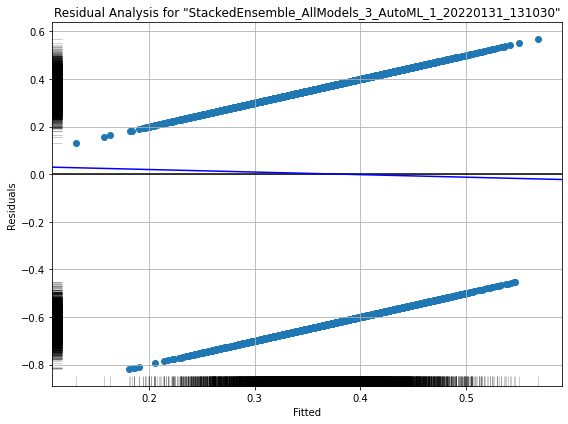

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

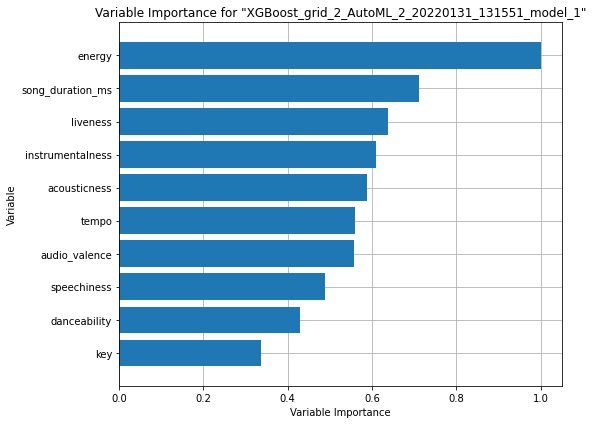

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

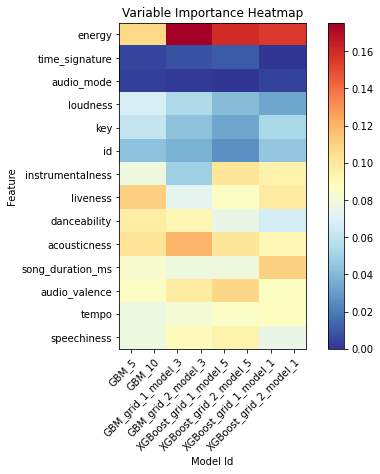

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

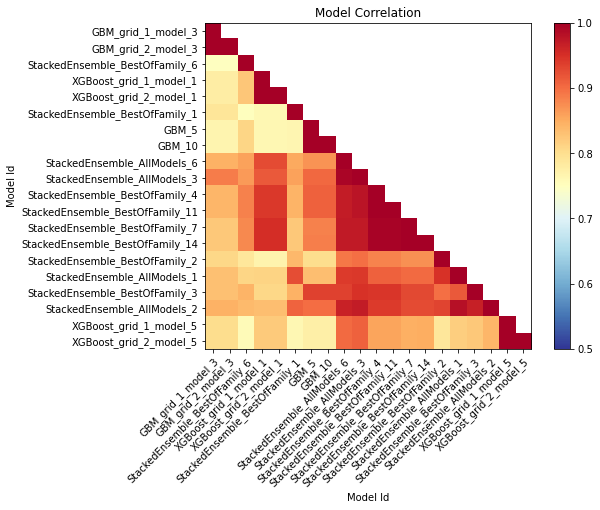

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

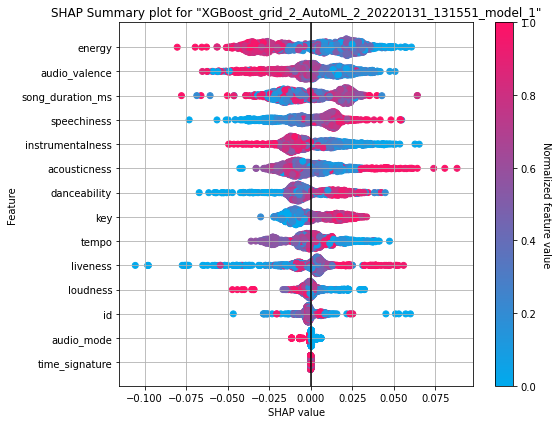

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

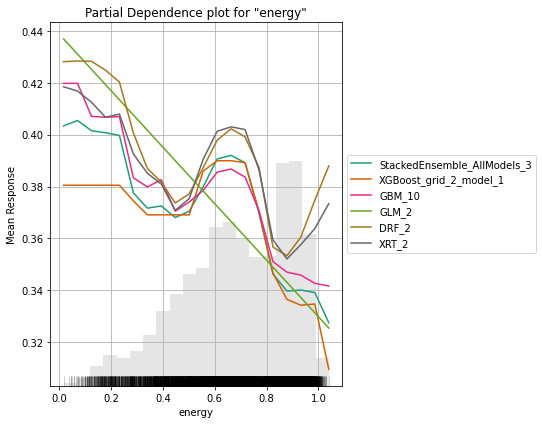

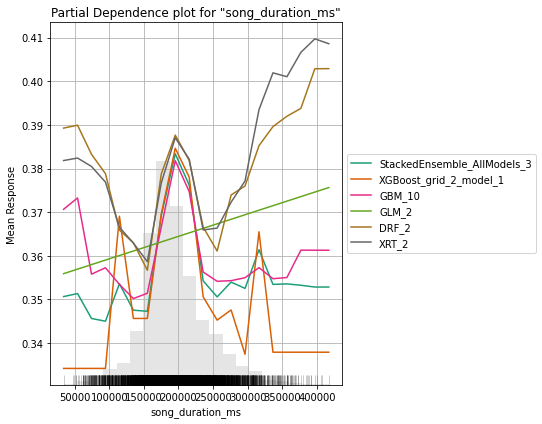

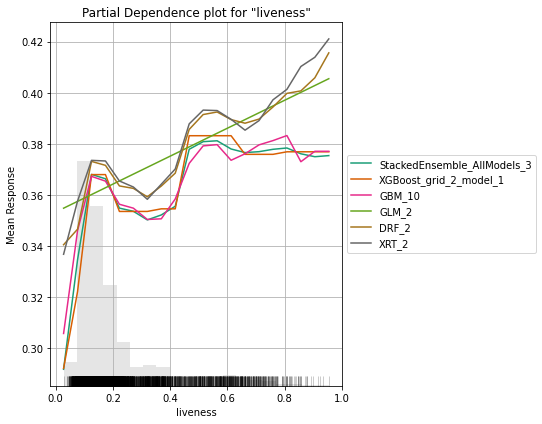

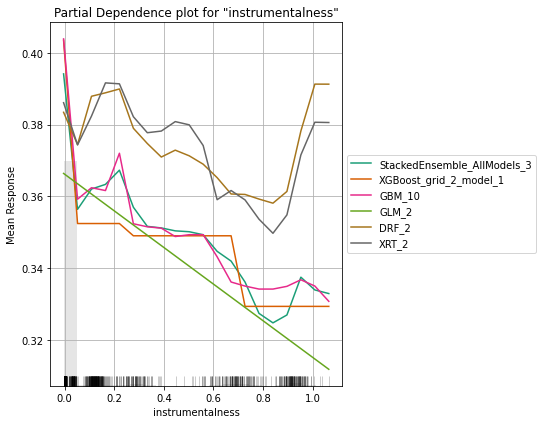

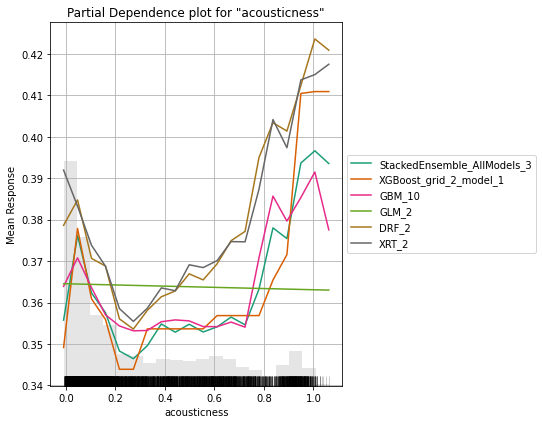

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

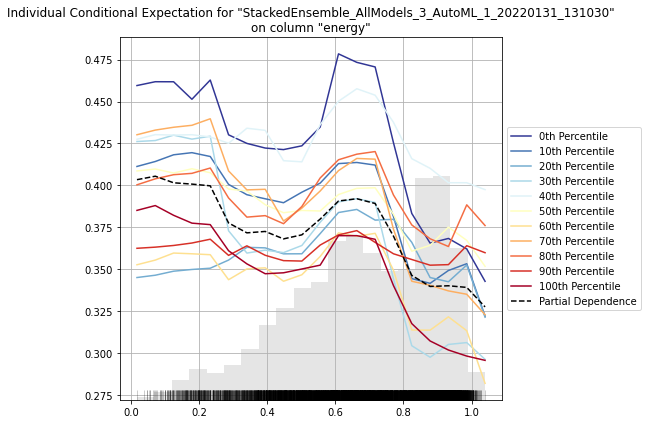

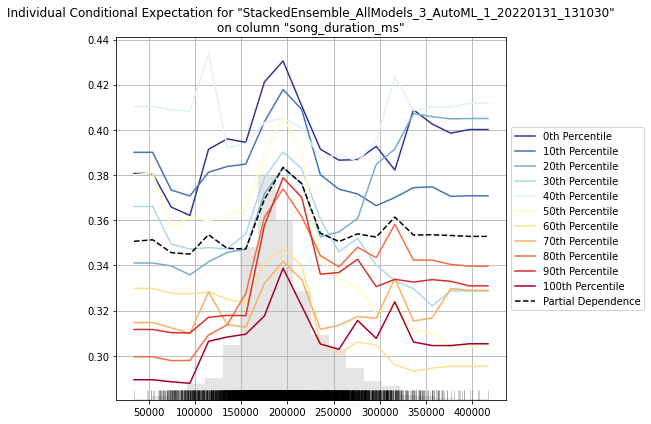

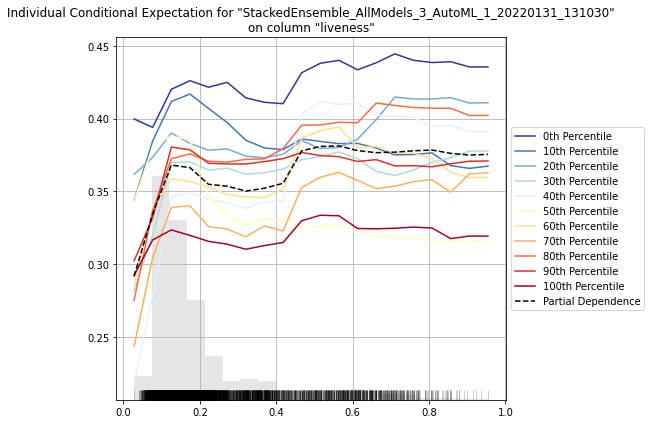

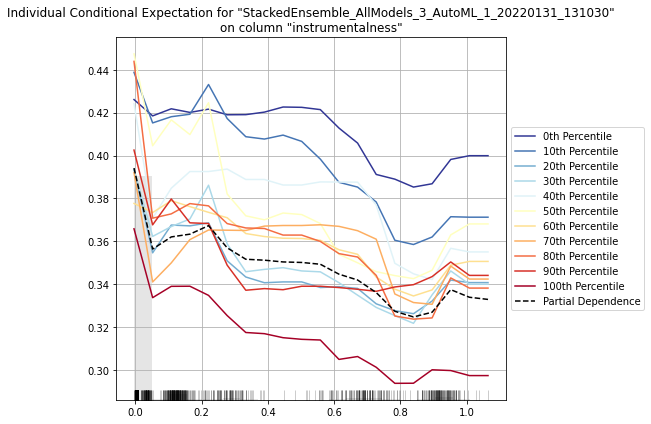

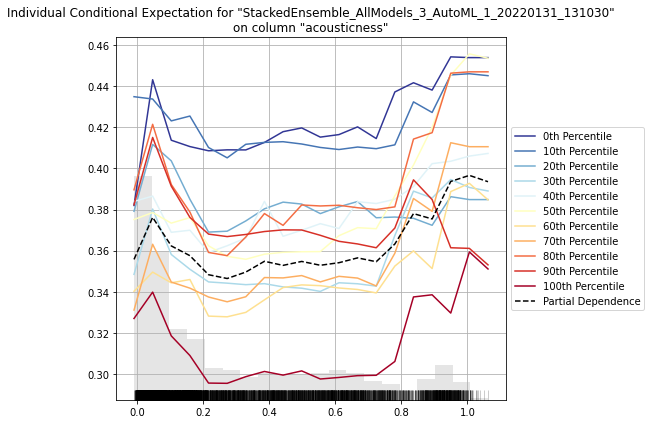

In [16]:
explain_model = aml.explain(frame = test, figsize = (8,6))

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo,predict
StackedEnsemble_AllModels_3_AutoML_1_20220131_131030,0.228518,0.478036,0.228518,0.456835,0.33627,985,0.048423,StackedEnsemble,0.259788
StackedEnsemble_BestOfFamily_11_AutoML_2_20220131_131551,0.228645,0.478169,0.228645,0.45715,0.336359,533,0.03433,StackedEnsemble,0.269649
StackedEnsemble_BestOfFamily_4_AutoML_1_20220131_131030,0.228645,0.478169,0.228645,0.45715,0.336359,757,0.032163,StackedEnsemble,0.269649
StackedEnsemble_AllModels_2_AutoML_1_20220131_131030,0.228689,0.478215,0.228689,0.457159,0.336392,681,0.033442,StackedEnsemble,0.265558
StackedEnsemble_AllModels_6_AutoML_1_20220131_131030,0.228721,0.478248,0.228721,0.457897,0.33642,2681,0.041936,StackedEnsemble,0.272524
StackedEnsemble_BestOfFamily_14_AutoML_2_20220131_131551,0.228766,0.478295,0.228766,0.458221,0.336455,1439,0.029727,StackedEnsemble,0.282058
StackedEnsemble_BestOfFamily_7_AutoML_1_20220131_131030,0.228769,0.478298,0.228769,0.458302,0.336458,1753,0.031473,StackedEnsemble,0.282955
StackedEnsemble_AllModels_1_AutoML_1_20220131_131030,0.228918,0.478454,0.228918,0.457581,0.336571,676,0.028412,StackedEnsemble,0.266905
StackedEnsemble_BestOfFamily_3_AutoML_1_20220131_131030,0.228968,0.478506,0.228968,0.457702,0.336603,782,0.03147,StackedEnsemble,0.26713
StackedEnsemble_BestOfFamily_2_AutoML_1_20220131_131030,0.229125,0.47867,0.229125,0.458164,0.336732,589,0.019277,StackedEnsemble,0.280809


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

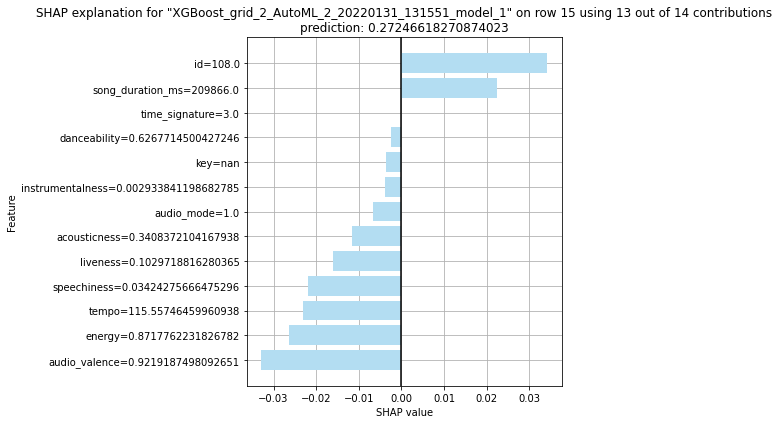

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo,predict
StackedEnsemble_AllModels_3_AutoML_1_20220131_131030,0.228518,0.478036,0.228518,0.456835,0.33627,985,0.048423,StackedEnsemble,0.259788
StackedEnsemble_BestOfFamily_11_AutoML_2_20220131_131551,0.228645,0.478169,0.228645,0.45715,0.336359,533,0.03433,StackedEnsemble,0.269649
StackedEnsemble_BestOfFamily_4_AutoML_1_20220131_131030,0.228645,0.478169,0.228645,0.45715,0.336359,757,0.032163,StackedEnsemble,0.269649
StackedEnsemble_AllModels_2_AutoML_1_20220131_131030,0.228689,0.478215,0.228689,0.457159,0.336392,681,0.033442,StackedEnsemble,0.265558
StackedEnsemble_AllModels_6_AutoML_1_20220131_131030,0.228721,0.478248,0.228721,0.457897,0.33642,2681,0.041936,StackedEnsemble,0.272524
StackedEnsemble_BestOfFamily_14_AutoML_2_20220131_131551,0.228766,0.478295,0.228766,0.458221,0.336455,1439,0.029727,StackedEnsemble,0.282058
StackedEnsemble_BestOfFamily_7_AutoML_1_20220131_131030,0.228769,0.478298,0.228769,0.458302,0.336458,1753,0.031473,StackedEnsemble,0.282955
StackedEnsemble_AllModels_1_AutoML_1_20220131_131030,0.228918,0.478454,0.228918,0.457581,0.336571,676,0.028412,StackedEnsemble,0.266905
StackedEnsemble_BestOfFamily_3_AutoML_1_20220131_131030,0.228968,0.478506,0.228968,0.457702,0.336603,782,0.03147,StackedEnsemble,0.26713
StackedEnsemble_BestOfFamily_2_AutoML_1_20220131_131030,0.229125,0.47867,0.229125,0.458164,0.336732,589,0.019277,StackedEnsemble,0.280809


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [17]:
aml.explain_row(frame = test, row_index = 15, figsize = (8,6))